# Cross Similarity

In [3]:
import librosa as librosa, librosa.display, os
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/anaconda2/lib/python2.7/site-packages/librosa/__init__.py:40: DeprecationWarning: You are using librosa with Python 2. Please note that librosa 0.7 will be the last version to support Python 2, after which it will require Python 3 or later.
  DeprecationWarning)


In [5]:
path = '../conv_genre_wavs/pop/'
songs = []
for f in tqdm(os.listdir(path)):
    song_path = os.path.join(path,f)
    songs.append(song_path)

100%|██████████| 99/99 [00:00<00:00, 56341.40it/s]


In [6]:
hop_length = 1024
a = []
b = []
xsims_score = []
aff_scores = []

for song1 in tqdm(songs):
    for song2 in songs:
        y1,sr1 = librosa.load(song1)
        y2,sr2 = librosa.load(song2)
        mfcc_ref = librosa.feature.mfcc(y=y1, sr=22050, hop_length=hop_length)
        mfcc_comp = librosa.feature.mfcc(y=y1, sr=22050, hop_length=hop_length)
        xsim = librosa.segment.cross_similarity(mfcc_comp, mfcc_ref)
        xsim_aff = librosa.segment.cross_similarity(mfcc_comp, mfcc_ref,k=2, mode='affinity')
        sim_score_cov,aff_sim_score_cov = np.cov(xsim).sum(), np.cov(xsim_aff).sum()
        a.append(os.path.basename(song1))
        b.append(os.path.basename(song2))
        xsims_score.append(sim_score_cov)
        aff_scores.append(aff_sim_score_cov)
        
df = pd.DataFrame()
df.insert(0,"A",a)
df.insert(1,"B",b)
df.insert(2,"SimScoreCovSum",xsims_score)
df.insert(3,"AffSimScoreSumCov", aff_scores)
# df.to_csv('.csv')

  0%|          | 0/99 [00:00<?, ?it/s]

NoBackendError: 

In [4]:
df.head()

,A,B,SimScoreCovSum,AffSimScoreSumCov
0,rock.00000.wav,./conv_genre_wavs/rock/rock.00000.wav,2.033929e-13,0.011126
1,rock.00000.wav,./conv_genre_wavs/rock/rock.00001.wav,1.139089e-13,0.025872
2,rock.00000.wav,./conv_genre_wavs/rock/rock.00002.wav,2.355616e-13,0.033186
3,rock.00000.wav,./conv_genre_wavs/rock/rock.00003.wav,2.259581e-13,0.043522
4,rock.00000.wav,./conv_genre_wavs/rock/rock.00004.wav,-3.592265e-14,0.023379


In [2]:
y_ref, sr = librosa.load(songs[0])
y_comp, sr = librosa.load(songs[1])
mfcc_ref = librosa.feature.mfcc(y=y_ref, sr=sr, hop_length=hop_length)
mfcc_comp = librosa.feature.mfcc(y=y_comp, sr=sr, hop_length=hop_length)
xsim = librosa.segment.cross_similarity(mfcc_comp, mfcc_ref)
xsim_aff = librosa.segment.cross_similarity(mfcc_comp, mfcc_ref,k=2, mode='affinity')
sim_score = str(xsim.sum()) +'/' + str(len(xsim))
aff_sim_score = xsim_aff.sum() / len(xsim_aff) * 100
sim_score_cov,aff_sim_score_cov = np.cov(xsim).sum(), np.cov(xsim_aff).sum()
columns = ["A","B","SimScoreSum", "SimScoreCovSum","AffSimScoreSum","AffSimScoreSumCov"]


filename1 = [os.path.basename(songs[0])]
filename2 = [os.path.basename(songs[1])]
sim_scores = [sim_score]
sim_scores_covs = [sim_score_cov]
aff_sim_scores = [aff_sim_score]
aff_sim_scores_covs = [aff_sim_score_cov]
df = pd.DataFrame()
df.insert(0,"A",filename1)
df.insert(1,"B",filename2)
df.insert(2,"SimScoreSum",sim_scores)
df.insert(3,"SimScoreCovSum",sim_scores_covs)
df.insert(4,"AffSimScoreSum",aff_sim_scores)
df.insert(5,"AffSimScoreSumCov", aff_sim_scores_covs)
# data = {"A": list(songs),"B": list(songs),"SimScoreSum": list(sim_score),"AffSimScoreSum":list(aff_sim_score)}
# data = np.asarray(data)
# row = np.ndarray.flatten(data)
# s = pd.DataFrame(data=data)
df.head()

# df1 = pd.DataFrame(data=s, columns=columns)
# df1.head()

NameError: name 'librosa' is not defined

In [6]:
hop_length = 1024
df = pd.DataFrame()
for i,song1 in tqdm(enumerate(songs[:1])):
    for j,song2 in tqdm(enumerate(songs[:2])):
        y_ref, sr = librosa.load(song1)
        y_comp, sr = librosa.load(song2)
        mfcc_ref = librosa.feature.mfcc(y=y_ref, sr=sr, hop_length=hop_length)
        mfcc_comp = librosa.feature.mfcc(y=y_comp, sr=sr, hop_length=hop_length)
        xsim = librosa.segment.cross_similarity(mfcc_comp, mfcc_ref)
        xsim_aff = librosa.segment.cross_similarity(mfcc_comp, mfcc_ref,k=2, mode='affinity')
        sim_score = xsim.sum()
        aff_sim_score = xsim_aff.sum()
        row = pd.Series(song1)
        df.append(row,ignore_index=True)
        
df.head()

0it [00:00, ?it/s]
0it [00:00, ?it/s]
1it [00:01,  1.16s/it]
1it [00:02,  2.30s/it]


""


In [1]:
df.head()

NameError: name 'df' is not defined

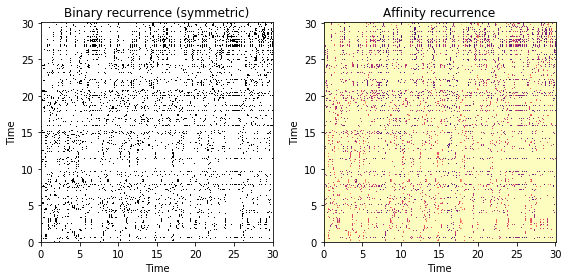

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
librosa.display.specshow(xsim, x_axis='time', y_axis='time', hop_length=hop_length)
plt.title('Binary recurrence (symmetric)')
plt.subplot(1, 2, 2)
librosa.display.specshow(xsim_aff, x_axis='time', y_axis='time',cmap='magma_r', hop_length=hop_length)
plt.title('Affinity recurrence')
plt.tight_layout()